In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt


In [2]:
dataset_path = r"C:\Users\Thirupathiamma\sustainability\archive\DATASET"

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_path + "/TRAIN",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    dataset_path + "/TEST",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


Found 22238 images belonging to 2 classes.
Found 2512 images belonging to 2 classes.


In [6]:
# ✅ Import required layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# ✅ Model creation
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ Model Created Successfully!")
model.summary()


✅ Model Created Successfully!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:

EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 736s 1s/step - accuracy: 0.8039 - loss: 0.4542 - val_accuracy: 0.8599 - val_loss: 0.3439
Epoch 2/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 821s 1s/step - accuracy: 0.8300 - loss: 0.4034 - val_accuracy: 0.8316 - val_loss: 0.4052
Epoch 3/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 687s 988ms/step - accuracy: 0.8426 - loss: 0.3776 - val_accuracy: 0.8750 - val_loss: 0.3116
Epoch 4/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 682s 981ms/step - accuracy: 0.8556 - loss: 0.3614 - val_accuracy: 0.8730 - val_loss: 0.3146
Epoch 5/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 496s 712ms/step - accuracy: 0.8566 - loss: 0.3468 - val_accuracy: 0.9001 - val_loss: 0.2675
Epoch 6/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 445s 640ms/step - accuracy: 0.8642 - loss: 0.3338 - val_accuracy: 0.9045 - val_loss: 0.2574
Epoch 7/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 475s 684ms/step - accuracy: 0.8694 - loss: 0.3227 - val_accuracy: 0.8969 - val_loss: 0.2797
Epoch 8/10
695/695 ━━━━━━━━━━━━━━━━━━━━ 477s 686ms/step - accuracy: 0.8707 - loss:

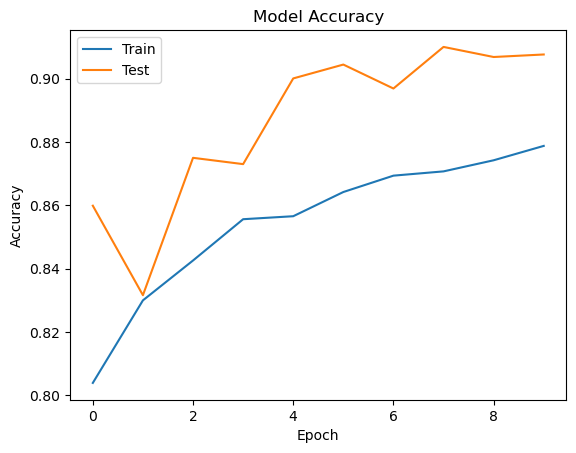

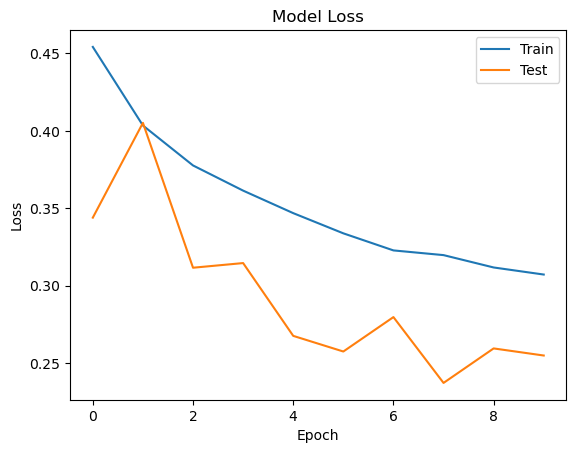

In [8]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()



In [9]:
loss, accuracy = model.evaluate(test_generator)
print(f"✅ Final Accuracy: {accuracy * 100:.2f}%")


79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 0.9076 - loss: 0.2548
✅ Final Accuracy: 90.76%


In [11]:
# ✅ Save model in the new recommended format
model.save("sustainable_image_cnn.keras")

print("✅ Model saved successfully as sustainable_image_cnn.keras")


✅ Model saved successfully as sustainable_image_cnn.keras
